# LSN Exercise 5

In this numerical exercise we are going to make use of the **Metropolis-Hastings algorithm** to sample fro, non trivial probability distributions: the pdf related to the $2p_z$ and $1s$ orbitals of an hydrogen atom.

In [1]:
# Settings and libraries:

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import matplotlib as mpl
mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['axes.labelsize'] = 16
mpl.rcParams['legend.fontsize'] = 14
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
SCALE = 6
FIG_SIZE = (SCALE*0.5*(1+np.sqrt(5)),SCALE)

# Input functions:

def Read(filename):
    with open(filename) as f:
        vector = [float(i) for i in f.read().splitlines()]
    return vector

## 5.1 Uniform sampling

Our aim is to give an estimation of the average distance from the origin of an electron in the orbital states $1s$ and $2p_z$. In order to achieve this, we need to sample from the squared modulus of the $1s$ and $2p_z$ wavefunctions, representing the probability density that the electron is in a particular position in space.

The *Metropolis* algorithm allows one to sample from a *generic non-normalized pdf* by implementing a RW in which each step $\mathbf{x}$ is sampled, given the previous one $\mathbf{y}$, via the *transition kernel* $T(\mathbf{x}|\mathbf{y})$, and accepted with probability $A(\mathbf{x}|\mathbf{y})$. Not considering the normalization factors:

$$ \left|\Psi_{1s}(r,\theta,\phi) \right|^2 = e^{-2r/a_0} \quad \left| \Psi_{2p_z}(r,\theta,\phi) \right|^2 = r^2 e^{-r/a_0} \cos^2(\theta) $$

measuring radial distances in units of *Bohr radius* $a_0$ and using cartesian coordinates:

$$ \left|\Psi_{1s}(x,y,z) \right|^2 = e^{-2\sqrt{x^2+y^2+z^2}} \quad \left| \Psi_{2p_z}(x,y,z) \right|^2 = z^2 e^{-\sqrt{x^2+y^2+z^2}} $$

we will use two different *symmetric* transition kernels, reducing the *acceptance* to:

$$ A(\mathbf{x}'|\mathbf{x}) = min \left\{ 1, \dfrac{p(\mathbf{x}')}{p(\mathbf{x})} \right\} $$

with $p$ the quared modulus of the wavefunctions given above.

The **first choice** is a *uniform transition probability* in 3D space: fixing the step length $r$ we sample from the solid angle $d\Omega = \sin\theta \, d\theta d\phi$ and we construct the new position using spherical coordinates. For *symmetry reasons* we *start* to equilibrate the sampling *from the origin* for the $1s$ orbital; instead, for the sampling of $2p_z$, we start from the position $(x,y,z)=(0,0,4)$ . We perfrom $n_{eq}=100$ *equilibration steps*, starting to save the positions in space for $n\ge n_{eq}$. Finally, the step lenght $r$ is chosen following the $50\%$ *acceptance rule*: we set a counter for the accepted moves, and we compute the ratio $n_{acc}/n_{tot}$ for a range of values of $r$, starting from $r=1$, obtaining:

$$ 1s \rightarrow A \sim 48\% \quad r = 1.2 $$
$$ 2p_z \rightarrow A \sim 51\% \quad r = 2.7 $$

In what follows we show a 3D representation of $ \left|\Psi_{1s}(x,y,z) \right|^2 $ and $ \left| \Psi_{2p_z}(r,\theta,\phi) \right|^2 $, obtained with $n_{tot} = 10000$ steps and $n_{eq}=100$ (folder `Orbitals`).

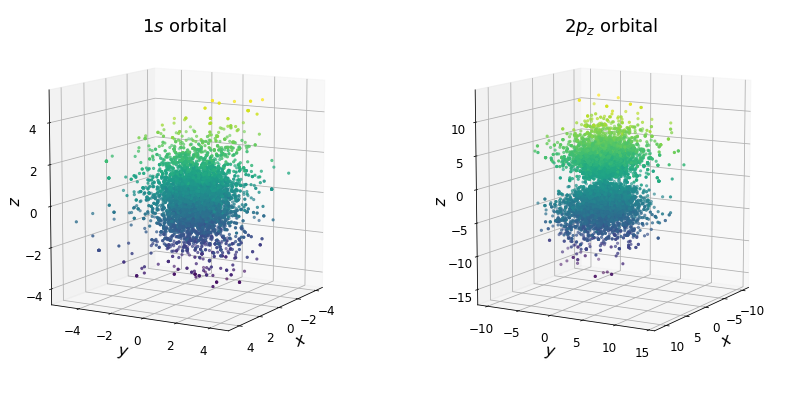

In [2]:
X_s = Read("Orbitals/X_s.txt")
Y_s = Read("Orbitals/Y_s.txt")
Z_s = Read("Orbitals/Z_s.txt")
X_p = Read("Orbitals/X_p.txt")
Y_p = Read("Orbitals/Y_p.txt")
Z_p = Read("Orbitals/Z_p.txt")

fig = plt.figure(figsize=(14,7))

ax1 = fig.add_subplot(1,2,1, projection='3d')
ax1.scatter(X_s, Y_s, Z_s, c=Z_s, marker='.')
ax1.set_title("$ 1s $ orbital")
ax1.set_xlabel('$ x $')
ax1.set_ylabel('$ y $')
ax1.set_zlabel('$ z $')
ax1.view_init(10, 30)

ax2 = fig.add_subplot(1,2,2, projection='3d')
ax2.scatter(X_p, Y_p, Z_p, c=Z_p, marker='.')
ax2.set_title("$ 2p_z $ orbital")
ax2.set_xlabel('$ x $')
ax2.set_ylabel('$ y $')
ax2.set_zlabel('$ z $')
ax2.view_init(10, 30)

To compute the average distance from the origin we use a large number of MC steps: $n_{tot} = 10^6$ steps and $n_{eq}=100$. In addition, to use *data-blocking*, we divide our full sampling set in $M = 100$ blocks of $N = 10000$ steps each. The following error plots shows the comparison between the estimated values and the analytical ones:

$$ \left\langle r \right\rangle_{1s} = \frac{3}{2} \quad \left\langle r \right\rangle_{2p_z} = 5 $$

if $r$ is measured in $a_0$ units.

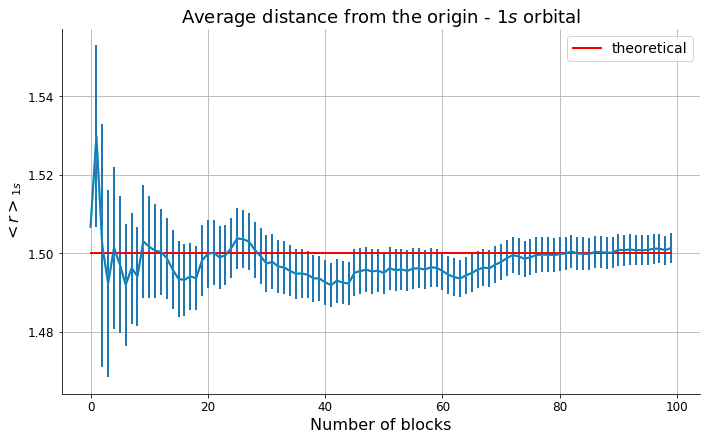

In [3]:
mean = Read("Unif/Mean_unif_s.txt")
error = Read("Unif/Error_unif_s.txt")

N = np.arange(len(mean))
exp = [1.5 for i in N]

plt.figure(figsize=FIG_SIZE, constrained_layout=True)
plt.errorbar(N, mean, yerr=error)
plt.plot(N, mean, color='cyan')
plt.title("Average distance from the origin - $ 1s $ orbital")
plt.plot(N, exp, color='red', label='theoretical')
plt.xlabel("Number of blocks")
plt.ylabel("$ <r>_{1s} $")
plt.legend()
plt.grid()

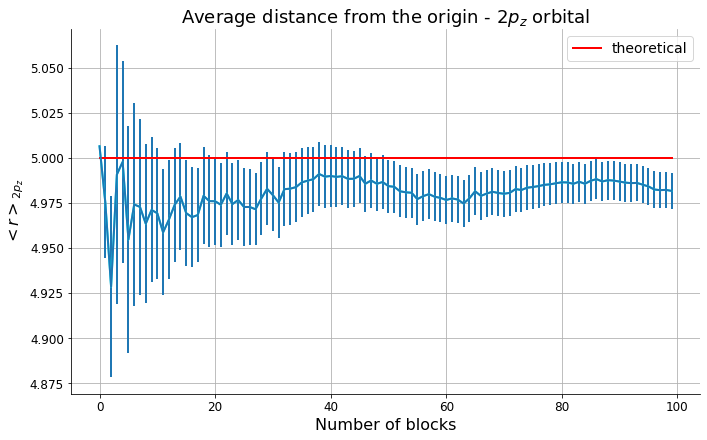

In [4]:
mean = Read("Unif/Mean_unif_p.txt")
error = Read("Unif/Error_unif_p.txt")

exp = [5.0 for i in N]

plt.figure(figsize=FIG_SIZE, constrained_layout=True)
plt.errorbar(N, mean, yerr=error)
plt.plot(N, mean, color='cyan')
plt.title("Average distance from the origin - $ 2p_z $ orbital")
plt.plot(N, exp, color='red', label='theoretical')
plt.xlabel("Number of blocks")
plt.ylabel("$ <r>_{2p_z} $")
plt.legend()
plt.grid()

The convergence to the expected value for the $1s$ orbital is accurate. Instead, for the $2p_z$ orbital, it seems there is a bias in the estimation, maybe induced by the starting point chosen.

## 5.2 Normal sampling

The **second choice** is a *multivariate normal transition probability*, i.e. a *gaussian* for each spatial coordinate, centered in the previous step of the RW. As in the uniform case, the kernel is symmetric, making the computation easier. We use again $n_{tot} = 10^6$ steps and $n_{eq}=100$ and we start the equilibration from the origin. By means of some trials RWs we estimated the best step lenghts:

$$ 1s \rightarrow A \sim 48\% \quad r = 0.8 $$
$$ 2p_z \rightarrow A \sim 53\% \quad r = 1.7 $$

As always, we use data-blocking to eliminate correlations and we compute errors progressively in the number of blocks. 

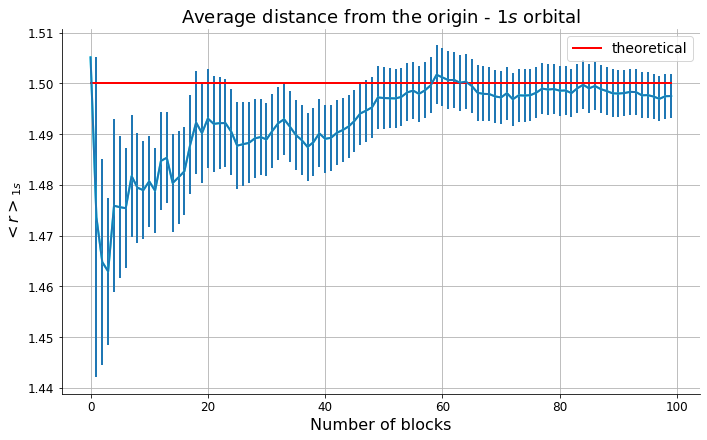

In [5]:
mean = Read("Gauss/Mean_norm_s.txt")
error = Read("Gauss/Error_norm_s.txt")

exp = [1.5 for i in N]

plt.figure(figsize=FIG_SIZE, constrained_layout=True)
plt.errorbar(N, mean, yerr=error)
plt.plot(N, mean, color='cyan')
plt.title("Average distance from the origin - $ 1s $ orbital")
plt.plot(N, exp, color='red', label='theoretical')
plt.xlabel("Number of blocks")
plt.ylabel("$ <r>_{1s} $")
plt.legend()
plt.grid()

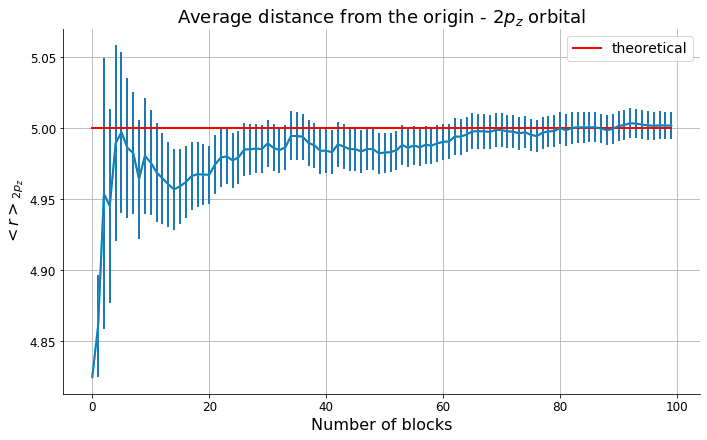

In [6]:
mean = Read("Gauss/Mean_norm_p.txt")
error = Read("Gauss/Error_norm_p.txt")

exp = [5.0 for i in N]

plt.figure(figsize=FIG_SIZE, constrained_layout=True)
plt.errorbar(N, mean, yerr=error)
plt.plot(N, mean, color='cyan')
plt.title("Average distance from the origin - $ 2p_z $ orbital")
plt.plot(N, exp, color='red', label='theoretical')
plt.xlabel("Number of blocks")
plt.ylabel("$ <r>_{2p_z} $")
plt.legend()
plt.grid()

Sampling from a normal distribution fixes the bias in the estimation of the average distance for the $2p_z$ orbital.